In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})
from keras.models import load_model

/Users/adishrao/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
Using TensorFlow backend.


In [3]:
model_image = load_model('fb_temp_3.h5')
model_eyes = load_model('eyes_only_addmult_Adam.h5')

In [3]:
dataset_dir = 'small_size_data'
label_dir = dataset_dir + '/validation/labels/'
img_dir = dataset_dir + '/validation/images/'

In [4]:
images = sorted(os.listdir(img_dir))
labels = sorted(os.listdir(label_dir))
# mac specific .DS_STORE 
if images[0] == '.DS_Store':
    images.remove('.DS_Store')
if labels[0] == '.npy':
    labels.pop(0)

In [5]:
X = []
Y = []
for img_path,lbl_path in zip(images,labels):
    # load image and label, resize, append
    img = cv2.imread(img_dir + img_path)
    img = np.float32(img) / 255
    X.append(img)
    lbl = np.load(label_dir + lbl_path)
    Y.append(lbl)        
X = np.array(X)
Y = np.array(Y)

In [6]:
initial_predict = model_image.predict(X)
initial_predict = np.argmax(initial_predict, axis=3)

In [7]:
from scipy.ndimage.measurements import label
 
structure = np.ones((3, 3), dtype=np.int)
  
for pred in initial_predict:
    pred_copy = np.copy(pred)
    pred_copy[ pred_copy > 0 ] = 1
 
    labeled, ncomponents = label(pred_copy, structure)
    unique, counts = np.unique(labeled, return_counts=True)
    unique = list(unique)
    counts = list(counts)
    unique.pop(0)
    counts.pop(0)
    largest = counts.index(max(counts))
    pred[[labeled!=(largest+1)]] = 0

/Users/adishrao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  app.launch_new_instance()


In [8]:
def find_middle(X):
    for i,r in enumerate(X):
        if 2 in r:
            break
    rowstart  = i
    for i,r in enumerate(X[::-1]):
        if 2 in r:
            break
    rowend  = 159 - i
    
    for j in range(96):
        if 2 in X[:,j]:
            break
    colstart = j
    colend = 0
    for r in X:
        for index,j in enumerate(r):
            if j == 2:
                if index>colend:
                    colend = index
    return (rowstart,rowend,colstart,colend)

In [1]:
xy_list = []
X_eyes = []
i = 0
for predict,img in zip(initial_predict,X):
    rowstart,rowend,colstart,colend = find_middle(predict)
    midY, midX = int((rowstart+rowend)/2), int((colstart+colend)/2)
    if midX <16:
        midX = 16
    if midX > (95-16):
        midX = 95 - 16
    new_X = img[(midY-16):(midY+16),(midX-16):(midX+16)]
    if new_X.shape != (32,32,3):
        print(i,new_X.shape)
    X_eyes.append(new_X)
    i+=1
    xy_list.append([midX,midY])
X_eyes = np.array(X_eyes)

NameError: name 'initial_predict' is not defined

[32, 61]


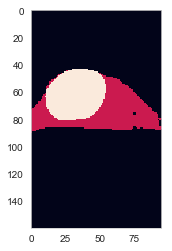

In [10]:
plt.imshow(initial_predict[0])
print(xy_list[0])

In [10]:
initial_eye_predict = model_eyes.predict(X_eyes)
initial_eye_predict = np.argmax(initial_eye_predict, axis=3)

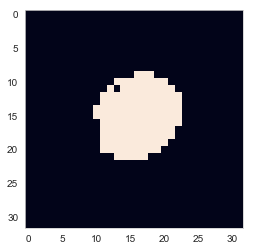

In [12]:
plt.imshow(initial_eye_predict[0])

In [11]:
for (predict,eye,(midx,midy)) in zip(initial_predict,initial_eye_predict,xy_list):
    i,j=0,0
    for row in range(midy-16,midy+16):
        j=0
        for col in range(midx-16,midx+16):
            if eye[i][j]==1:
                predict[row][col] = 3 
            j+=1
        i+=1

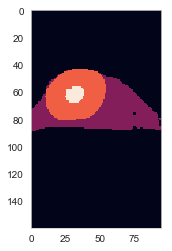

In [13]:
plt.imshow(initial_predict[0])

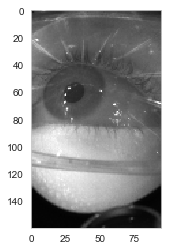

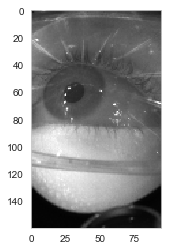

In [42]:
plt.imshow(X[100])

In [12]:
def IoU(Yi,y_predi):
    ## mean Intersection over Union
    ## Mean IoU = TP/(FN + TP + FP)

    IoUs = []
    Nclass = int(np.max(Yi)) + 1
    for c in range(Nclass):
        TP = np.sum( (Yi == c)&(y_predi==c) )
        FP = np.sum( (Yi != c)&(y_predi==c) )
        FN = np.sum( (Yi == c)&(y_predi != c)) 
        IoU = TP/float(TP + FP + FN)
        print("class {:02.0f}: #TP={:6.0f}, #FP={:6.0f}, #FN={:5.0f}, IoU={:4.3f}".format(c,TP,FP,FN,IoU))
        IoUs.append(IoU)
    mIoU = np.mean(IoUs)
    print("_________________")
    print("Mean IoU: {:4.3f}".format(mIoU))
    
IoU(initial_predict,Y)

class 00: #TP=30741405, #FP=133015, #FN=175978, IoU=0.990
class 01: #TP=2645314, #FP=242249, #FN=152621, IoU=0.870
class 02: #TP=2712048, #FP= 83647, #FN=146916, IoU=0.922
class 03: #TP=324924, #FP= 27478, #FN=10874, IoU=0.894
_________________
Mean IoU: 0.919


In [ ]:
Mean IoU: 0.942
submitted: 0.936

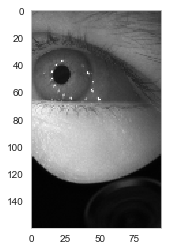

In [13]:
plt.imshow(X[200])

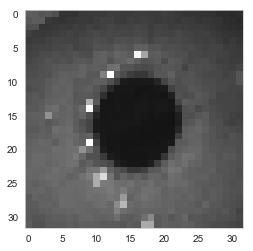

In [14]:
plt.imshow(X_eyes[200])

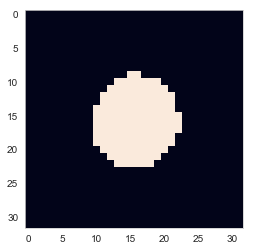

In [15]:
plt.imshow(initial_eye_predict[200])

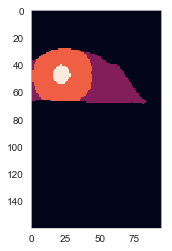

In [17]:
plt.imshow(initial_predict[200])

# Submission

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})
from keras.models import load_model

/Users/adishrao/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
Using TensorFlow backend.


In [2]:
model_image = load_model('fb_temp_3.h5')
model_eyes = load_model('eyes_only_addmult_Adam.h5')

In [3]:
dataset_dir = 'small_size_data'
img_dir = dataset_dir + '/test/images/'

In [4]:
images = sorted(os.listdir(img_dir))
# mac specific .DS_STORE 
if images[0] == '.DS_Store':
    images.remove('.DS_Store')

In [5]:
X = []
for img_path in images:
    # load image and label, resize, append
    img = cv2.imread(img_dir + img_path)
    img = np.float32(img) / 255
    X.append(img)     
X = np.array(X)


In [6]:
initial_predict = model_image.predict(X)
initial_predict = np.argmax(initial_predict, axis=3)

In [7]:
from scipy.ndimage.measurements import label
 
structure = np.ones((3, 3), dtype=np.int)
  
for pred in initial_predict:
    pred_copy = np.copy(pred)
    pred_copy[ pred_copy > 0 ] = 1
 
    labeled, ncomponents = label(pred_copy, structure)
    unique, counts = np.unique(labeled, return_counts=True)
    unique = list(unique)
    counts = list(counts)
    unique.pop(0)
    counts.pop(0)
    largest = counts.index(max(counts))
    pred[[labeled!=(largest+1)]] = 0

/Users/adishrao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  app.launch_new_instance()


In [8]:
def find_middle(X):
    for i,r in enumerate(X):
        if 2 in r:
            break
    rowstart  = i
    for i,r in enumerate(X[::-1]):
        if 2 in r:
            break
    rowend  = 159 - i
    
    for j in range(96):
        if 2 in X[:,j]:
            break
    colstart = j
    colend = 0
    for r in X:
        for index,j in enumerate(r):
            if j == 2:
                if index>colend:
                    colend = index
    return (rowstart,rowend,colstart,colend)

In [9]:
xy_list = []
X_eyes = []
i = 0
for predict,img in zip(initial_predict,X):
    rowstart,rowend,colstart,colend = find_middle(predict)
    midY, midX = int((rowstart+rowend)/2), int((colstart+colend)/2)
    if midX <16:
        midX = 16
    if midX > (95-16):
        midX = 95 - 16
    if midY<16 or midY>(159-16):
        midY = 159//2
    new_X = img[(midY-16):(midY+16),(midX-16):(midX+16)]
    if new_X.shape != (32,32,3):
        print(i,new_X.shape)
    X_eyes.append(new_X)
    i+=1
    xy_list.append([midX,midY])
X_eyes = np.array(X_eyes)

[31, 126]

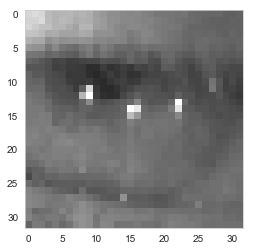

In [22]:
plt.imshow(X_eyes[928])
xy_list[928]

[46, 128]

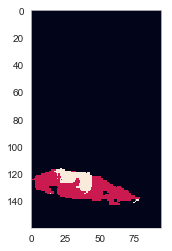

In [12]:
plt.imshow(initial_predict[928])
xy_list[928]

In [11]:
initial_eye_predict = model_eyes.predict(X_eyes)
initial_eye_predict = np.argmax(initial_eye_predict, axis=3)

In [13]:
for (predict,eye,(midx,midy)) in zip(initial_predict,initial_eye_predict,xy_list):
    i,j=0,0
    for row in range(midy-16,midy+16):
        j=0
        for col in range(midx-16,midx+16):
            if eye[i][j]==1:
                predict[row][col] = 3 
            j+=1
        i+=1

In [ ]:
def find_middle_eye(X):
    for i,r in enumerate(X):
        if 3 in r:
            break
    rowstart  = i
    for i,r in enumerate(X[::-1]):
        if 3 in r:
            break
    rowend  = 159 - i
    
    for j in range(96):
        if 3 in X[:,j]:
            break
    colstart = j
    colend = 0
    for r in X:
        for index,j in enumerate(r):
            if j == 3:
                if index>colend:
                    colend = index
    return (rowstart,rowend,colstart,colend)

In [ ]:
for predict in initial_predict:
    rowstart,rowend,colstart,colend = find_middle_eye(predict)
    midY, midX = int((rowstart+rowend)/2), int((colstart+colend)/2)
    predict[:(midY-40)].fill(0)
    predict[(midY+40):].fill(0)

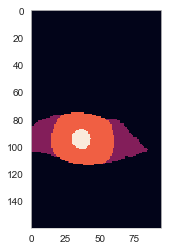

In [14]:
plt.imshow(initial_predict[300])

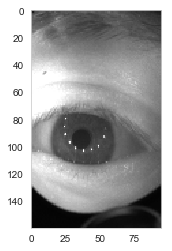

In [15]:
plt.imshow(X[300])

In [16]:
model_eyes.count_params()+model_image.count_params()

261669

In [17]:
label_dir = dataset_dir + '/test/labels/'
for pred,path in zip(initial_predict,images):
    height = 640
    width = 400
    pred = np.array(pred, dtype='uint8')
    label = cv2.resize(pred, (width, height))
    np.save(arr=label,file=f'{label_dir}{path[:-4]}.npy')

In [4]:
model_eyes.count_params()

62626

In [5]:
model_image.count_params()

199043